In [2]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

# Punto 1 
A) Use el API de institutions para extraer la lista de instituciones del país

In [142]:
df = pd.read_json('data.json')
rand = np.random.randint(0,248) 
pais = df.loc[rand,'Name'].lower().replace(" ", "")
URL = 'https://inspirehep.net/api/institutions?q=' + pais

('greece', 85)

In [148]:
df = pd.read_json(URL)

if df['hits']['hits'][0]['metadata']['number_of_papers']>0:
    print ('legacy_ICN:',df['hits']['hits'][0]['metadata']['legacy_ICN'])

legacy_ICN: American Coll. of Greece


B) Con el API de literatura obtenga el JSON con los artículos de menos de 10 autores usando el "legacy_ICN" de la siguiente manera


In [154]:
df = pd.read_json('literature.json')
df['hits']['hits'][0]['metadata']['author_count']

7

In [178]:
df = pd.read_json('1010271.json')
df['metadata']['name']                        #Nombre
df['metadata']['email_addresses']             #Email
df['metadata']['positions'][1]['rank']        #rank
df['metadata']['positions'][1]['institution'] #institucion
df['metadata']['positions'][1]['start_date']  #fecha de inicio
df['metadata']['positions'][1]['end_date']    #fecha de terminacion 

'2001'

# Punto 2 

#### A) Genere un polinomio de numpy con 3 raices reales aleatorias entre los dos últimos números diferentes de su identificación (Ejemplo: 98554575 → 3 raices reales aleatorias  entre 5 y 7 )

Id: x.xxx.xxx.x37

In [519]:
r = np.random.uniform(3,7,3) 
p = np.poly1d(np.poly(r))   

#### B) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

In [585]:
dp = np.polyder(p) #Derivada del polinomio 
crit_p = dp.r      #Raices de la derivada 
d2p = np.polyder(p,m=2) #Derivada del polinomio 
print(crit_p)

[6.25683275 4.21105995]


#### C) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

In [590]:
print('Punto crítico:', np.min(dp.r), '\n \t Eval. segunda derivada: ', d2p(np.min(dp.r)))
print('Punto crítico:', np.max(dp.r), '\n \t Eval. segunda derivada: ', d2p(np.max(dp.r)))

Punto crítico: 4.2110599538624545 
 	 Eval. segunda derivada:  -6.137318399077795
Punto crítico: 6.256832753555052 
 	 Eval. segunda derivada:  6.137318399077792


El primer punto crítico es un máximo, pues $p''(x_c) < 0$, es un maximo global 

El primer punto crítico es un mínimo, pues $p''(x_c) > 0$, es un mínimo global 

#### D) Grafique el polinomío inclueyendo los puntos asociados a las raices.

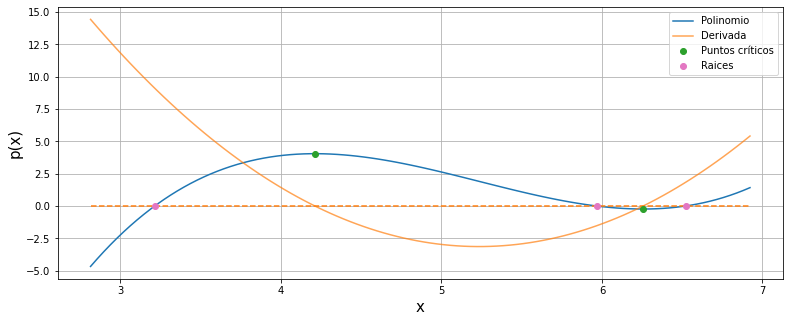

In [602]:
x = np.linspace(np.min(p.r)-.4,np.max(p.r)+.4,100)
plt.figure(figsize = (13,5))
plt.plot(x, p(x), label = 'Polinomio')
plt.plot(x, dp(x), label = 'Derivada' , alpha = .7)
plt.plot([np.min(p.r)-.4,np.max(p.r)+.4], [0,0], 'C1--')
plt.plot([np.min(crit_p),np.max(crit_p)], [p(np.min(crit_p)), p(np.max(crit_p))], 'C2o', label = 'Puntos críticos')
# plt.plot(float(d2p.r), p(float(d2p.r)) , 'C3o', label = 'Punto de inflexión')
plt.plot(p.r,np.zeros(len(p.r)), 'C6o', label = 'Raices')
plt.xlabel('x', size = 15)
plt.ylabel('p(x)', size = 15)
plt.legend()
plt.grid()